In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
N_BEST = [1, 3, 7, 13, 20]
WEIGHTS = [True, False]

In [9]:
accuracies_weighted = []
f1scores_weighted = []
accuracies = []
f1scores = []

for n_best in N_BEST:
    for b_weight in WEIGHTS:
        if n_best == 1 and b_weight:
            continue

        file = f'../results/measures_bm25_01_0.15_ShuffTrue_StratTrue_Weigh{b_weight}_NoStopTrue_StemFalse_LowFalse_NoPunTrue_Nbest{n_best}.csv'
        metrics = pd.read_csv(file, sep='\t')
        acc = metrics['accuracy'].mean()
        f1 = metrics['macro avg.f1-score'].mean()

        if b_weight:
            accuracies_weighted.append(acc)
            f1scores_weighted.append(f1)
        else:
            accuracies .append(acc)
            f1scores.append(f1)

accuracies_weighted = [accuracies[0]] + accuracies_weighted
f1scores_weighted = [f1scores[0]] + f1scores_weighted

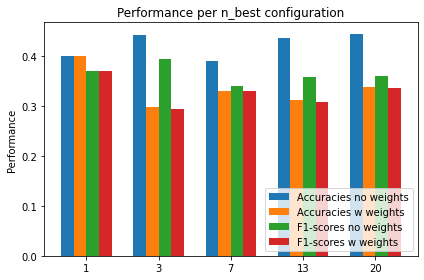

In [25]:
labels = N_BEST

x = np.arange(len(labels))  # the label locations
width = 0.175  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 3*width/2, accuracies, width, label='Accuracies no weights')
rects2 = ax.bar(x - width/2, accuracies_weighted, width, label='Accuracies w weights')
rects3 = ax.bar(x + width/2, f1scores, width, label='F1-scores no weights')
rects4 = ax.bar(x + 3*width/2, f1scores_weighted, width, label='F1-scores w weights')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance')
ax.set_title('Performance per n_best configuration')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc="lower right")

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.savefig('../results/measures_bm25_n_best_comparison.png')
plt.show()


